In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib import cm
import datetime
import seaborn as sns
import glob
import seaborn as sns
import re
import os

In [2]:
files=[i for i in glob.glob('D:\Data Science\Practice\*video*.{}'.format('csv'))]
sorted(files)

['D:\\Data Science\\Practice\\CAvideos.csv',
 'D:\\Data Science\\Practice\\DEvideos.csv',
 'D:\\Data Science\\Practice\\FRvideos.csv',
 'D:\\Data Science\\Practice\\GBvideos.csv',
 'D:\\Data Science\\Practice\\USvideos.csv']

In [3]:
dfs=list()
for csv in files:
    df=pd.read_csv(csv,index_col='video_id')
    df['country']=csv[25:27]
    dfs.append(df)
    
my_df=pd.concat(dfs)
my_df.head(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA


In [4]:
my_df['trending_date']=pd.to_datetime(my_df.trending_date,errors='coerce',format='%y.%d.%m')
my_df['publish_time']=pd.to_datetime(my_df.publish_time,errors='coerce',format='%Y-%m-%dT%H:%M:%S.%fZ')

my_df=my_df[my_df.trending_date.notnull()]
my_df=my_df[my_df.publish_time.notnull()]

my_df=my_df.dropna(how='any',inplace=False,axis=0)
my_df.head(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA


In [5]:
my_df.insert(4,'publish_date',my_df.publish_time.dt.date)
my_df.publish_time=my_df.publish_time.dt.time
my_df.head(3)

,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,,
n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13,17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA


In [6]:
my_df_full=my_df.reset_index().sort_values('trending_date').set_index('video_id')
my_df=my_df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
my_df[['publish_date','publish_time']]

,publish_date,publish_time
video_id,,
5x1FAiIq_pQ,2017-11-09,15:49:21
zy0b9e40tK8,2017-11-09,09:00:07
Y6eKxjMA9ek,2017-11-09,16:00:09
Q6Usd3_fbq8,2017-11-10,04:08:31
F-j_6IuaYfw,2017-11-08,21:05:20
...,...,...
-BQJo3vK8O8,2018-03-09,11:00:01
hfIuAWQBZzc,2018-03-11,21:21:32
U4s17X4dLW8,2018-03-09,15:00:03


In [7]:
my_df.category_id=my_df.category_id.astype(str)
my_df_full.category_id=my_df_full.category_id.astype(str)

category_id={}

with open('D:\\Data Science\\Practice\\US_category_id.json','r') as f:
    data=json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']
category_id
# data['items']

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [8]:
my_df.insert(4,'category',my_df['category_id'].map(category_id))
my_df_full.insert(4,'category',my_df_full['category_id'].map(category_id))
category_list=my_df['category'].unique()
category_list

array(['Music', 'Entertainment', 'Comedy', 'People & Blogs',
       'News & Politics', 'Howto & Style', 'Sports',
       'Science & Technology', 'Education', 'Autos & Vehicles',
       'Pets & Animals', 'Film & Animation', 'Gaming', 'Shows',
       'Travel & Events', 'Nonprofits & Activism'], dtype=object)

#  How long usually a video can trend in these countries?


In [9]:
freq_df=pd.DataFrame(my_df_full.groupby([my_df_full.index,'country']).count()['title'].sort_values(ascending=False)).reset_index()
freq_df.head(), freq_df.tail()

(      video_id country  title
 0  BhIEIO0vaBE      GB     36
 1  2z3EUY1aXdY      GB     36
 2  NooW_RbfdWI      GB     36
 3  baj6llvgpWA      GB     35
 4  tEnCoocmPQM      GB     35,
           video_id country  title
 52307  PfdXS5UETPc      DE      1
 52308  PfgxcqW3fac      DE      1
 52309  PfmlL1BFtJg      CA      1
 52310  Pfo0Yjl87cE      FR      1
 52311  zzz0_5fMnI8      FR      1)

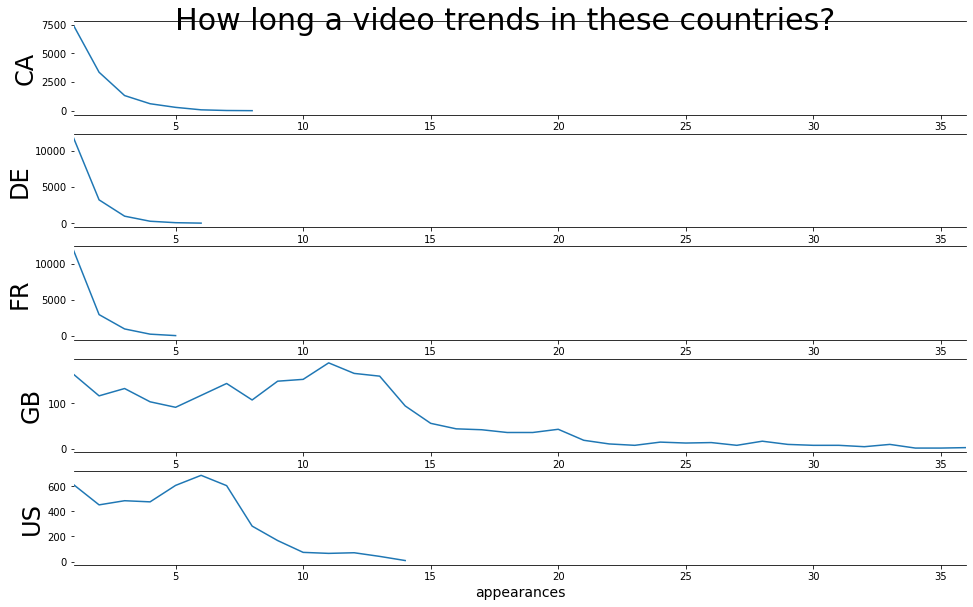

In [10]:
video_list=list()
max_list=list()
country_list=my_df.groupby(['country']).count().index

for c in country_list:
    video_list.append(freq_df[freq_df['country']== c]['title'].value_counts().sort_index())
    max_list.append(max(freq_df[freq_df['country']==c]['title'].value_counts().sort_index().index))
    
fig, [ax0,ax1,ax2,ax3,ax4]= plt.subplots(nrows=5,ncols=1,figsize=(16,10))
st = fig.suptitle('How long a video trends in these countries?', fontsize=30)
st.set_y(0.9)
for i,pt in enumerate([ax0,ax1,ax2,ax3,ax4]):
    pt.plot(video_list[i].index,video_list[i])
    pt.spines['right'].set_visible(False)
    pt.spines['left'].set_visible(False)
    pt.set_xlabel("appearances",fontsize=14)
    pt.set_ylabel(country_list[i],fontsize=24)
    pt.axes.set_xlim(1,max(max_list))
    
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0);

From the line graphs above we can see that United Kingdom has numbers of enduring video in trend followed by US.

# Ratio of Youtube Trending Videos

In [11]:
labels=my_df.groupby(['country']).count().index
sizes=my_df.groupby(['country']).count()['title']
labels

Index(['CA', 'DE', 'FR', 'GB', 'US'], dtype='object', name='country')

country
CA    10370
DE    13867
FR    14227
GB     2200
US     3817
Name: title, dtype: int64

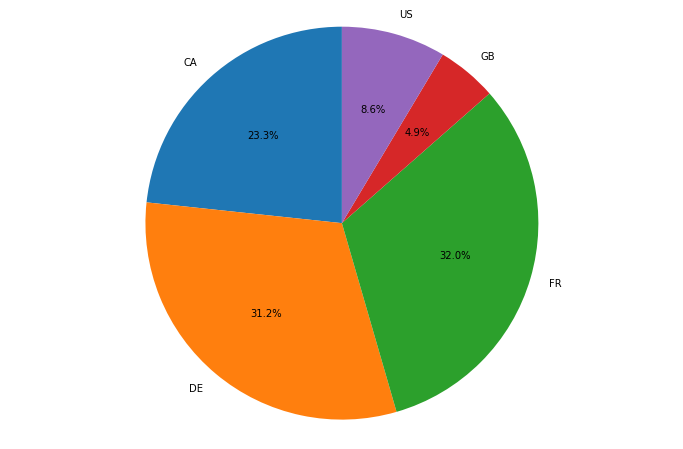

In [12]:
fig,ax=plt.subplots(figsize=(12,8))
ax.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%')
ax.axis('equal')
sizes

# Analysis : How many likes, dislikes, views and comments get by different countries?

In [13]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44481 entries, 5x1FAiIq_pQ to 2afSbqlp5HU
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           44481 non-null  datetime64[ns]
 1   title                   44481 non-null  object        
 2   channel_title           44481 non-null  object        
 3   category_id             44481 non-null  object        
 4   category                44481 non-null  object        
 5   publish_date            44481 non-null  object        
 6   publish_time            44481 non-null  object        
 7   tags                    44481 non-null  object        
 8   views                   44481 non-null  object        
 9   likes                   44481 non-null  object        
 10  dislikes                44481 non-null  object        
 11  comment_count           44481 non-null  float64       
 12  thumbnail_link          44481 non-n

In [14]:
to_int=['views','likes', 'dislikes','comment_count']
for column in to_int:
    my_df[column]=my_df[column].astype(int)
    
measures=list()
n_groups=len(country_list)
for i, typ in enumerate(to_int):
    measure=list()
    for c in country_list:
        measure.append(my_df[my_df.country==c][typ].agg('sum')/len(my_df[my_df.country==c].index.unique()))
        measures.append(measure)

0 AxesSubplot(0.125,0.536818;0.352273x0.343182)
1 AxesSubplot(0.547727,0.536818;0.352273x0.343182)
0 AxesSubplot(0.125,0.125;0.352273x0.343182)
1 AxesSubplot(0.547727,0.125;0.352273x0.343182)


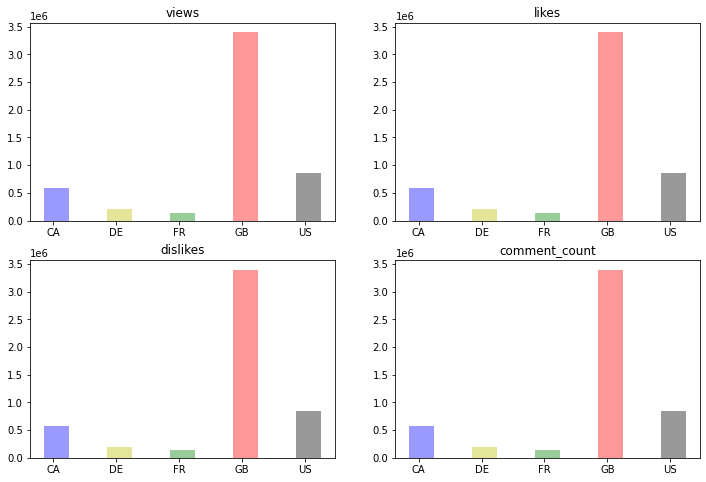

In [15]:
fig, [[ax1, ax2], [ax3, ax4]]=plt.subplots(ncols=2,nrows=2,figsize=(12,8))

index = np.arange(n_groups)
bar_width=0.1
opacity=0.4
error_config = {'ecocolor':'0.3'}

for i, axs in enumerate([[ax1, ax2], [ax3, ax4]]):
    for j, ax in enumerate(axs):
        print(j,ax)
        ax.bar(index + (bar_width), measures[(i+j)+i], bar_width*4,
               alpha=opacity, color=['b','y','g','r','k'], error_kw=error_config)
        ax.set_title(to_int[(i+j)+i])
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(country_list)

# Analysis : Correlation of trending video in between countries

In [16]:
corr_list=pd.DataFrame(freq_df['video_id'].unique(),columns=['video_id'])
for country_code in freq_df['country'].unique():
    corr_list[country_code]=0
corr_list['total']=0
corr_list=corr_list.set_index('video_id')
corr_list.head()

,GB,US,CA,DE,FR,total
video_id,,,,,,
BhIEIO0vaBE,0,0,0,0,0,0
2z3EUY1aXdY,0,0,0,0,0,0
NooW_RbfdWI,0,0,0,0,0,0
baj6llvgpWA,0,0,0,0,0,0
tEnCoocmPQM,0,0,0,0,0,0


In [17]:
for index,item in corr_list.iterrows():
    total=0
    for i,row in freq_df[freq_df['video_id']==index][['country','title']].iterrows():
        total+=row['title']
        corr_list.loc[[index],[row['country']]]= row['title']
    corr_list.loc[[index],['total']]=total
corr_list.head()

,GB,US,CA,DE,FR,total
video_id,,,,,,
BhIEIO0vaBE,36,10,6,5,4,61
2z3EUY1aXdY,36,4,6,5,5,56
NooW_RbfdWI,36,10,6,5,3,60
baj6llvgpWA,35,7,4,2,2,50
tEnCoocmPQM,35,7,4,1,1,48


<ipython-input-18-8cbc216ab733>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels,minor=False,fontsize=15)
<ipython-input-18-8cbc216ab733>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels,minor=False,fontsize=15)


,GB,US,CA,DE,FR
GB,1.000000,0.218285,0.099436,-0.029548,-0.050694
US,0.218285,1.000000,0.142272,-0.067510,-0.120630
CA,0.099436,0.142272,1.000000,0.007937,-0.079173
DE,-0.029548,-0.067510,0.007937,1.000000,-0.223375
FR,-0.050694,-0.120630,-0.079173,-0.223375,1.000000


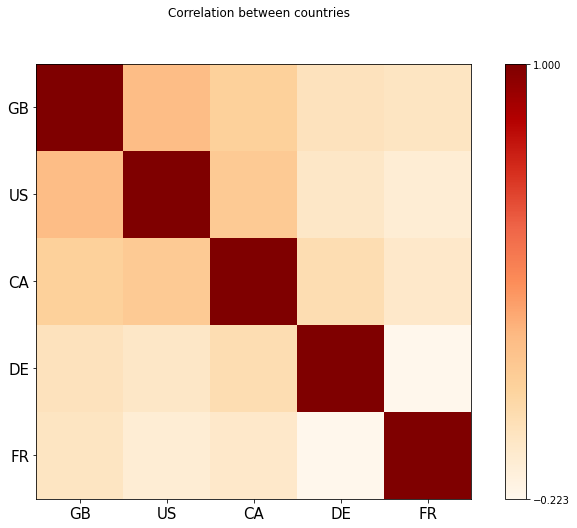

In [18]:
countries=['GB', 'US', 'CA', 'DE', 'FR'] 
corr_matrix=corr_list[countries].corr()

fig,ax=plt.subplots(figsize=(12,8))
fig.suptitle('Correlation between countries')
heatmap=ax.imshow(corr_matrix,interpolation='nearest',cmap=cm.OrRd)

cbar_min=corr_matrix.min().min()
cbar_max=corr_matrix.max().max()
cbar=fig.colorbar(heatmap,ticks=[cbar_max,cbar_min])

labels=['']
for column in countries:
    labels.append(column)
    
ax.set_yticklabels(labels,minor=False,fontsize=15)
ax.set_xticklabels(labels,minor=False,fontsize=15)
corr_matrix

# Analysis : Users like videos from which CATEGORY the most?

From United Kingdom Users :

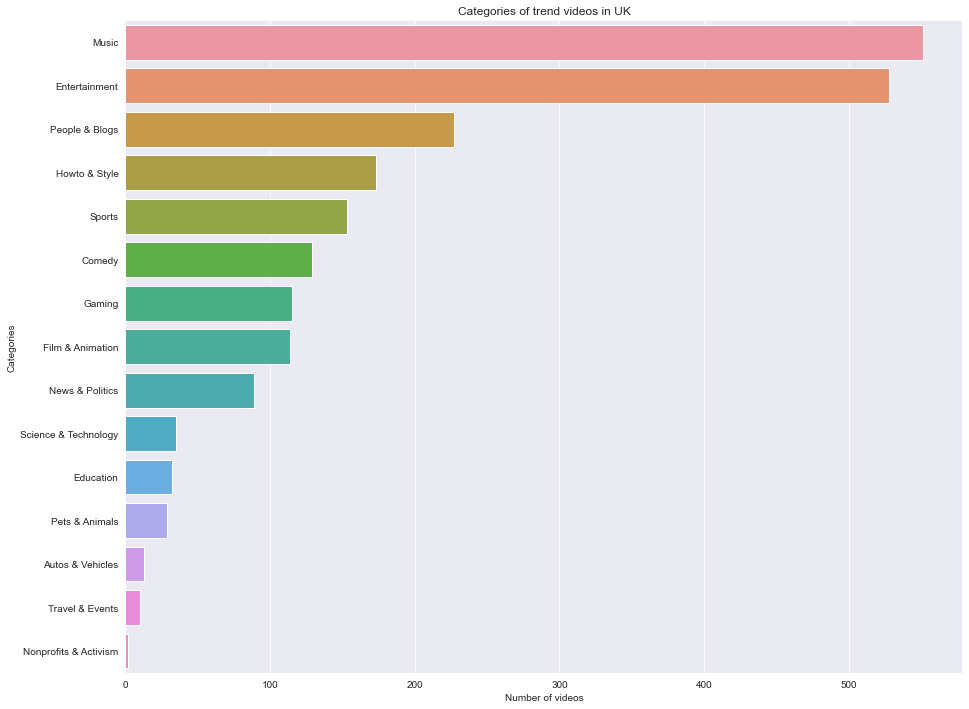

In [19]:
cat_df_gb=my_df[my_df['country']=='GB']['category'].value_counts().reset_index()
plt.figure(figsize=(15,12))
sns.set_style('darkgrid')
ax=sns.barplot(y=cat_df_gb['index'],x=cat_df_gb['category'],data=cat_df_gb,orient='h')
plt.xlabel('Number of videos')
plt.ylabel('Categories')
plt.title('Categories of trend videos in UK');

From US Users :

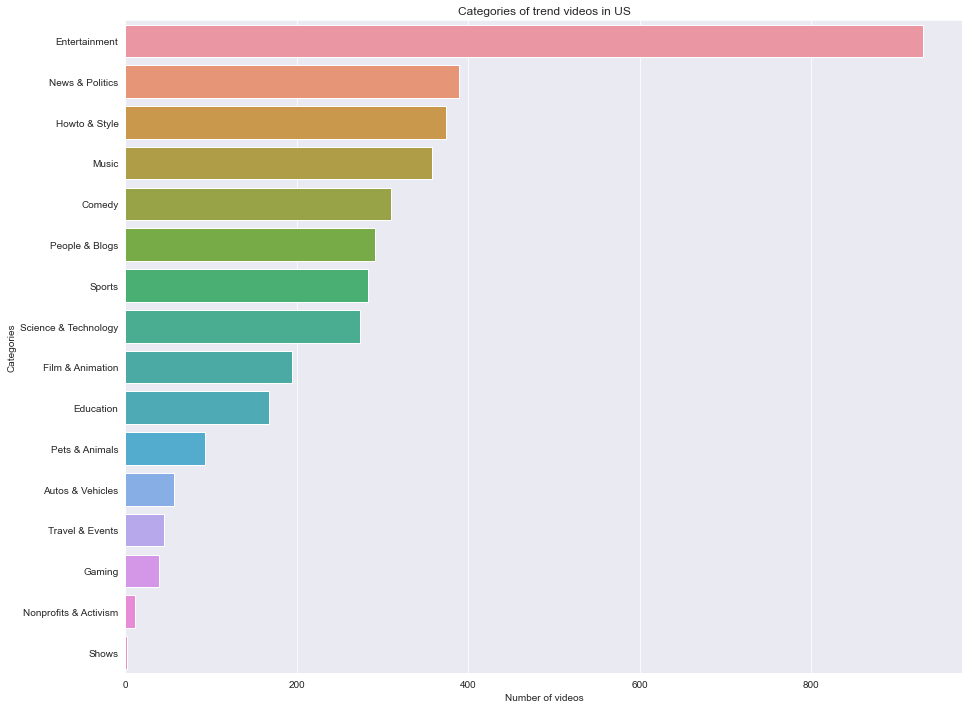

In [20]:
cat_df_us=my_df[my_df['country']=='US']['category'].value_counts().reset_index()
plt.figure(figsize=(15,12))
sns.set_style('darkgrid')
ax=sns.barplot(y=cat_df_us['index'],x=cat_df_us.category,data=cat_df_us,orient='h')
plt.xlabel('Number of videos')
plt.ylabel('Categories')
plt.title('Categories of trend videos in US');

From Canada Users:

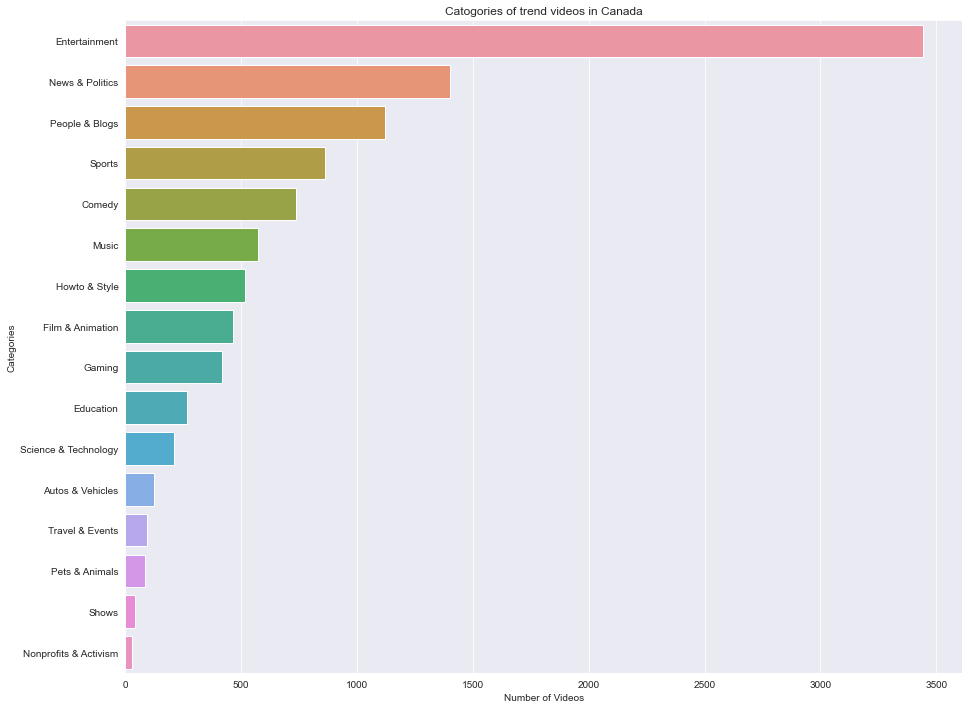

In [21]:
cat_df_ca=my_df[my_df.country == 'CA']['category'].value_counts().reset_index()
plt.figure(figsize=(15,12))
sns.set_style("darkgrid")
ax = sns.barplot(y=cat_df_ca['index'],x=cat_df_ca['category'], data=cat_df_ca,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in Canada");

From Germany Users:

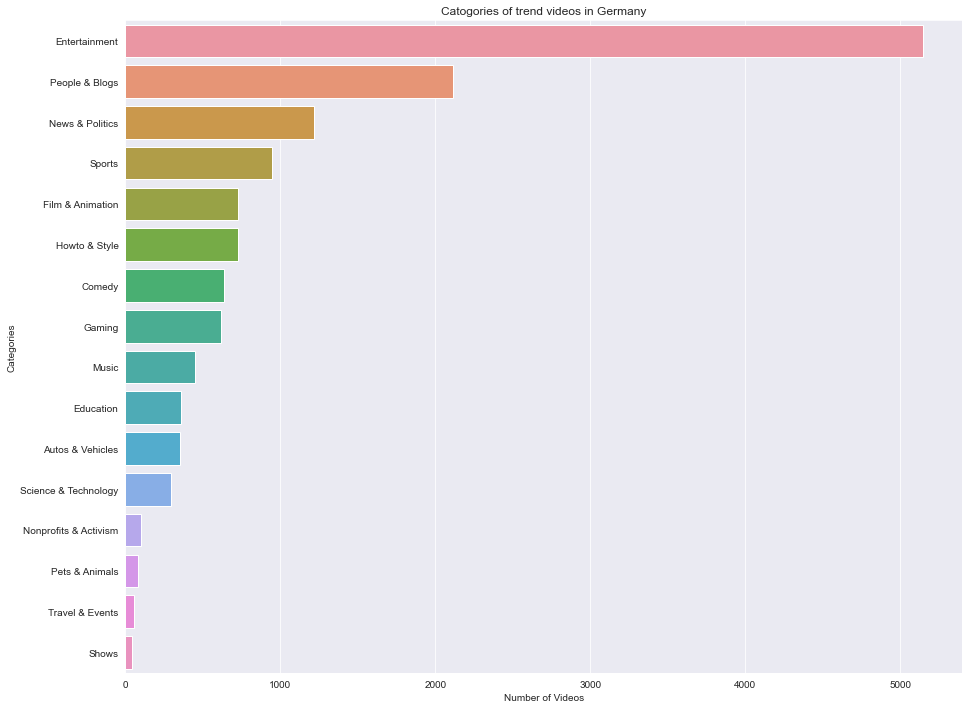

In [22]:
cat_df_de=my_df[my_df.country == 'DE']['category'].value_counts().reset_index()
plt.figure(figsize=(15,12))
sns.set_style("darkgrid")
ax = sns.barplot(y=cat_df_de['index'],x=cat_df_de['category'], data=cat_df_de,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in Germany");

From France Users:

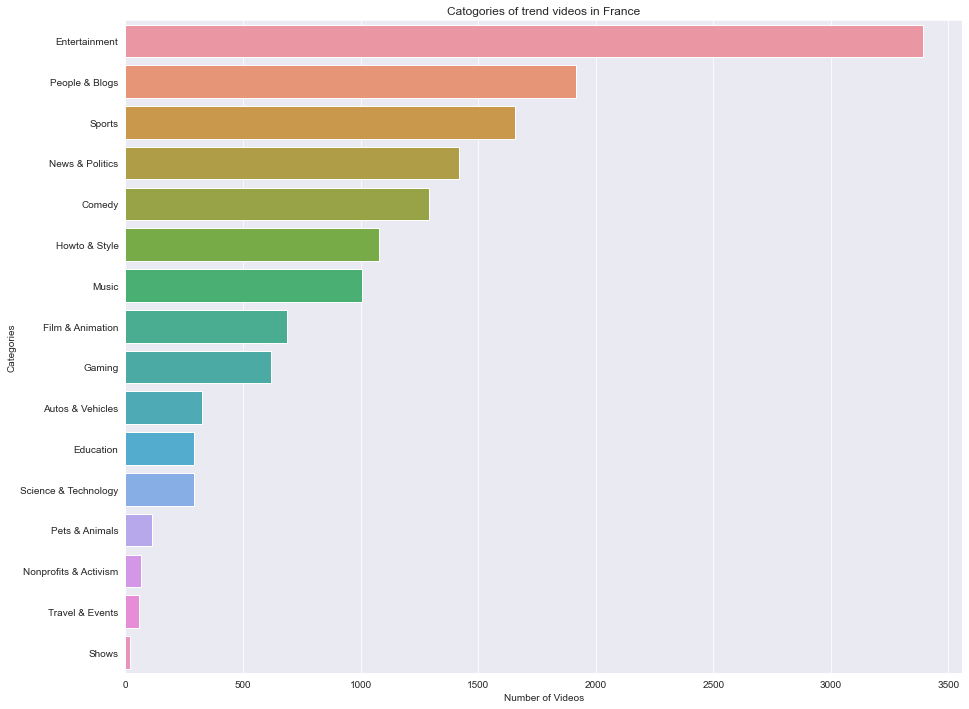

In [23]:
cat_df_fr=my_df[my_df.country == 'FR']['category'].value_counts().reset_index()
plt.figure(figsize=(15,12))
sns.set_style("darkgrid")
ax = sns.barplot(y=cat_df_fr['index'],x=cat_df_fr['category'], data=cat_df_fr,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in France");

Observation:


# Analysis : Videos from which category has longer trend?

In [24]:
publish_to_trend={}
my_df_first=my_df_full.reset_index().drop_duplicates('video_id',keep='first').set_index('video_id')
diff_first=(my_df_first.trending_date).astype('datetime64[ns]')-my_df_first.publish_date.astype('datetime64[ns]')     

diff_first=diff_first.reset_index()
diff_first.columns=['video_id','publish_to_trend']

for i,row in diff_first.iterrows():
    publish_to_trend[row['video_id']]=row['publish_to_trend'].days

my_df_last=my_df

c:\users\tharu\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arrays\timedeltas.py:957: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  data = objects_to_td64ns(data, unit=unit, errors=errors)


In [25]:
diff_last=my_df.trending_date.astype('datetime64[ns]')-my_df.publish_date.astype('datetime64[ns]')  
diff_last=diff_last.reset_index()
diff_last.columns=['video_id','publish_to_trend_last']
my_df=my_df.reset_index()
my_df.insert(4,'publish_to_trend_last',diff_last.publish_to_trend_last.astype('timedelta64[D]').astype(int))
my_df.columns
my_df.insert(4,'publish_to_trend',my_df['video_id'].map(publish_to_trend))
my_df.insert(4,'trend_duration',0)

my_df['trend_duration']=(my_df.publish_to_trend_last-my_df.publish_to_trend)+1
my_df.set_index('video_id')[['publish_to_trend','trend_duration']].sort_values('trend_duration',ascending=False).head()

,publish_to_trend,trend_duration
video_id,,
BhIEIO0vaBE,1,36
2z3EUY1aXdY,0,36
NooW_RbfdWI,1,36
YtKap-E0OGM,0,35
tEnCoocmPQM,1,35


Heatmap : Categories v/s Trending Duration

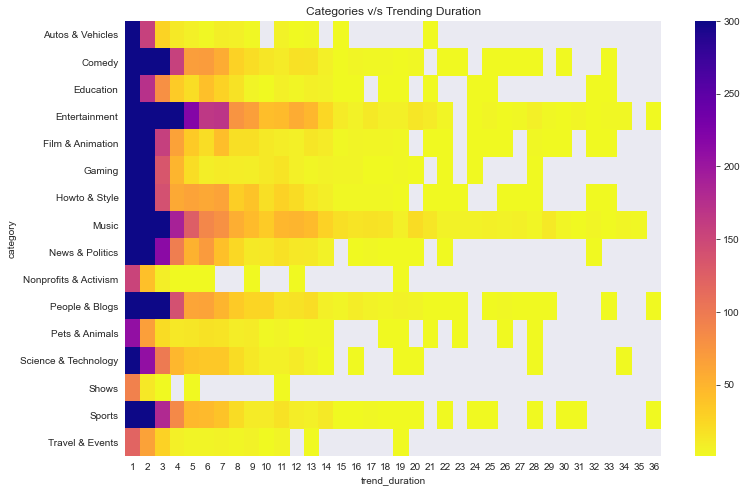

In [26]:
cat_trend_duration=my_df.groupby(['category','trend_duration']).count()['video_id'].unstack().clip(upper=300)
# cat_trend_duration
plt.figure(figsize=(12,8))
sns.heatmap(cat_trend_duration,cmap='plasma_r')
plt.title('Categories v/s Trending Duration');

# Analysis : Correlation between Days of Publish to Trend v/s Trending Duration?

Heatmap : Days of Publish to Trend v/s Trending Duration

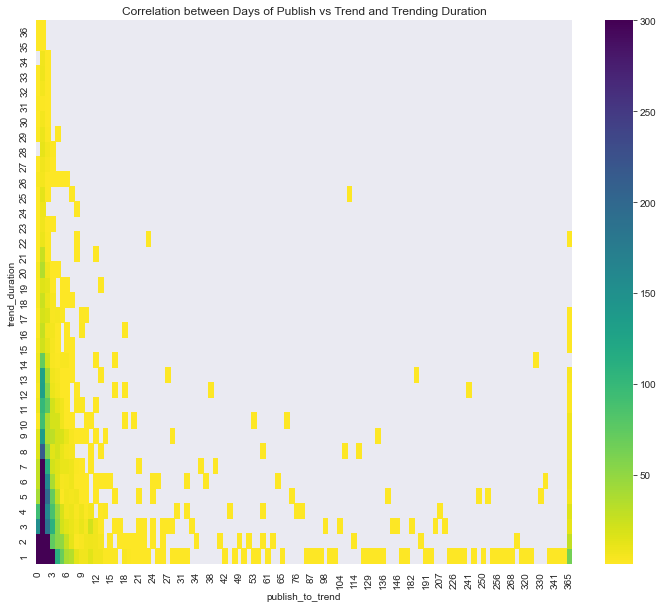

In [27]:
my_df['publish_to_trend']=my_df['publish_to_trend'].clip(upper=365)
cat_trend_duration=my_df.groupby(['trend_duration','publish_to_trend']).count()['video_id'].unstack().clip(upper=300)
plt.figure(figsize=(12,10))
ax=sns.heatmap(cat_trend_duration,cmap='viridis_r')
ax.invert_yaxis()
plt.title('Correlation between Days of Publish vs Trend and Trending Duration');

# Analysis : What is the ratio of Likes-Dislikes and Views-Comments in different categories?

Likes-Dislikes Ratio

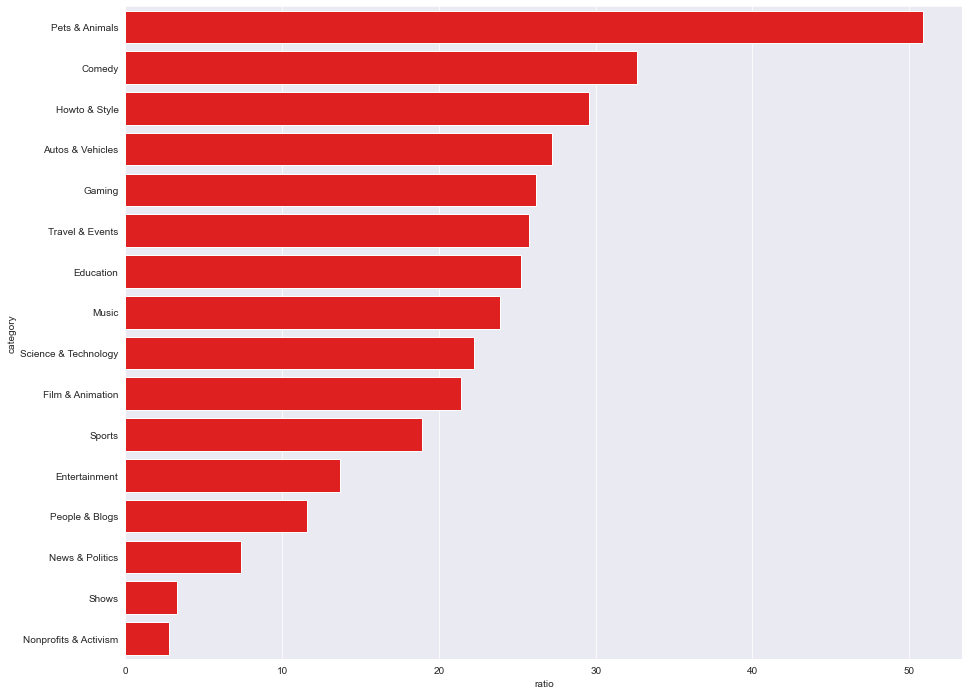

In [28]:
like_dislike_ratio=my_df.groupby('category')['likes'].agg('sum')/my_df.groupby('category')['dislikes'].agg('sum')
like_dislike_ratio=like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns=['category','ratio']
plt.subplots(figsize=(15,12))
sns.barplot(x='ratio',y='category',data=like_dislike_ratio,
            label='Like-Dislike Ratio',color='r');

Views-Comments Ratio

c:\users\tharu\appdata\local\programs\python\python38\lib\site-packages\pandas\core\dtypes\cast.py:280: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


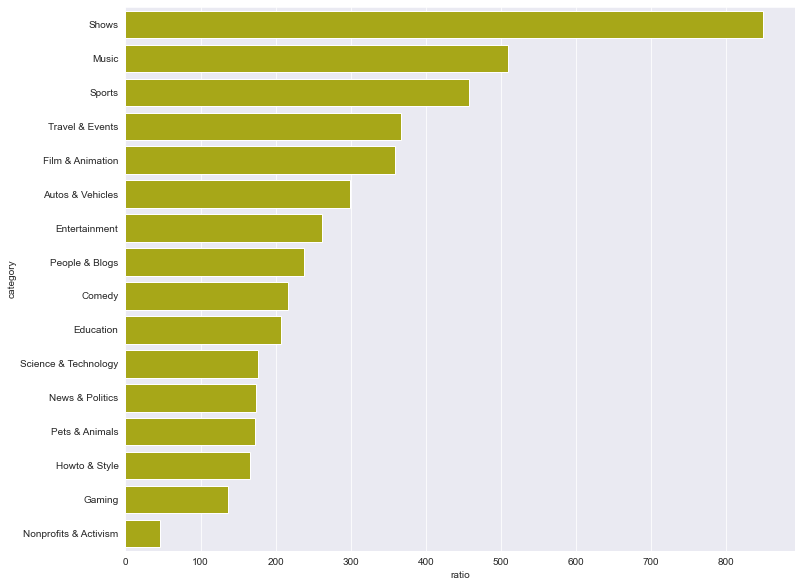

In [29]:
views_comments_ratio=my_df.groupby('category')['views'].agg('sum')/my_df.groupby('category')['comment_count'].agg('sum')
views_comments_ratio=views_comments_ratio.sort_values(ascending=False).reset_index()
views_comments_ratio.columns=['category','ratio']
plt.subplots(figsize=(12,10))
sns.barplot(x='ratio',y='category',data=views_comments_ratio,
             label='Views-Comments Ratio',color='y');

Dislikes-Views Ratio

c:\users\tharu\appdata\local\programs\python\python38\lib\site-packages\pandas\core\dtypes\cast.py:280: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


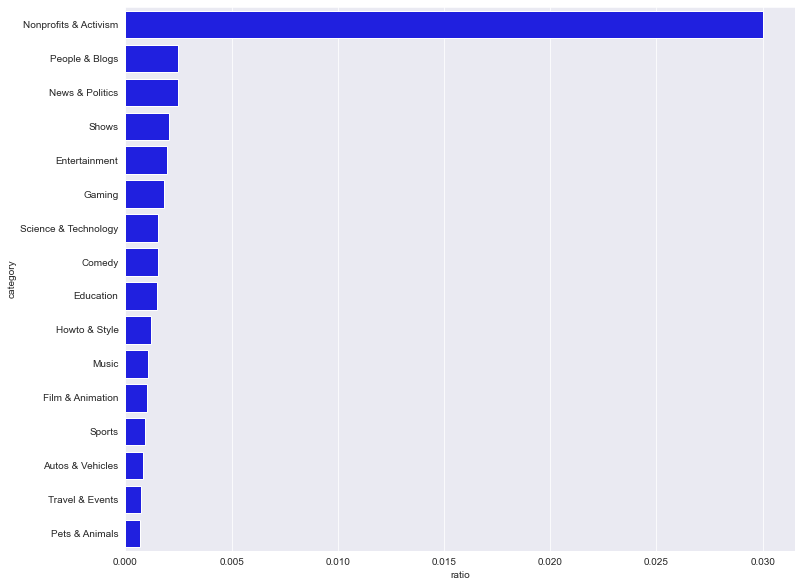

In [30]:
views_dislike_ratio=my_df.groupby('category')['dislikes'].agg('sum')/my_df.groupby('category')['views'].agg('sum')
views_dislike_ratio=views_dislike_ratio.sort_values(ascending=False).reset_index()
views_dislike_ratio.columns=['category','ratio']
plt.subplots(figsize=(12,10))
sns.barplot(x='ratio',y='category',data=views_dislike_ratio,
             label='Dislikes-Views Ratio',color='b');

Likes-Views Ratio

c:\users\tharu\appdata\local\programs\python\python38\lib\site-packages\pandas\core\dtypes\cast.py:280: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


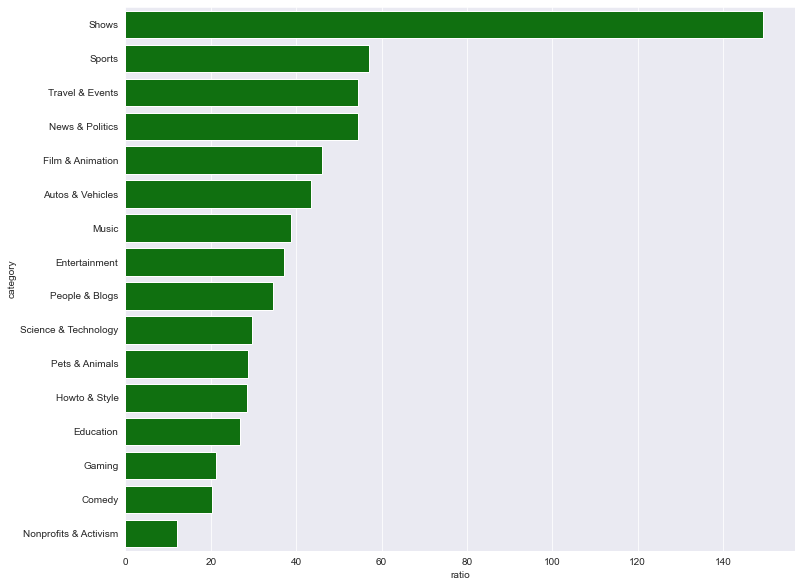

In [31]:
view_like_ratio=my_df.groupby('category')['views'].agg('sum')/my_df.groupby('category')['likes'].agg('sum')
view_like_ratio=view_like_ratio.sort_values(ascending=False).reset_index()
view_like_ratio.columns=['category','ratio']
plt.subplots(figsize=(12,10))
sns.barplot(x='ratio',y='category',data=view_like_ratio,
            label='Likes-Views Ratio',color='g');

Observation:

# Analysis: Sentiment analysis on Video's tags

In [33]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [32]:
from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

In [35]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tharu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
MAX_N=1000

en_stopwords= list(stopwords.words('english'))
de_stopwords=list(stopwords.words('german'))
fr_stopwords=list(stopwords.words('french'))
en_stopwords.extend(de_stopwords)
en_stopwords.extend(fr_stopwords)

polarities=list()

for cate in category_list:
    tags_word=my_df[my_df['category']== cate]['tags'].str.lower().str.cat(sep=' ')
    
    tags_word=re.sub('[^A-Za-z]+', ' ',tags_word)
    word_tokens=word_tokenize(tags_word)
    filtered_sentence=[w for w in word_tokens if not w in en_stopwords]
    without_single_chr=[word for word in filtered_sentence if len(word)>2] 
    
    cleaned_data_title=[word for word in without_single_chr if not word.isdigit()]
        
    word_dist=nltk.FreqDist(cleaned_data_title)
    hnhk=pd.DataFrame(word_dist.most_common(MAX_N),columns=['Word','Frequency'])

    compound=.0
    for word in hnhk['Word'].head(MAX_N):
        compound+= SentimentIntensityAnalyzer().polarity_scores(word)['compound']
        
    polarities.append(compound)

In [38]:
category_list=pd.DataFrame(category_list)
polarities=pd.DataFrame(polarities)
tags_sentiment=pd.concat([category_list,polarities],axis=1)
tags_sentiment.columns=['category','polarity']
tags_sentiment=tags_sentiment.sort_values('polarity').reset_index()
tags_sentiment

,index,category,polarity
0,4,News & Politics,-3.4565
1,9,Autos & Vehicles,-1.2605
2,15,Nonprofits & Activism,0.3369
3,13,Shows,1.2876
4,7,Science & Technology,3.6159
5,11,Film & Animation,4.9613
6,8,Education,5.7365
7,1,Entertainment,8.8036
8,12,Gaming,8.8684
9,2,Comedy,9.0537


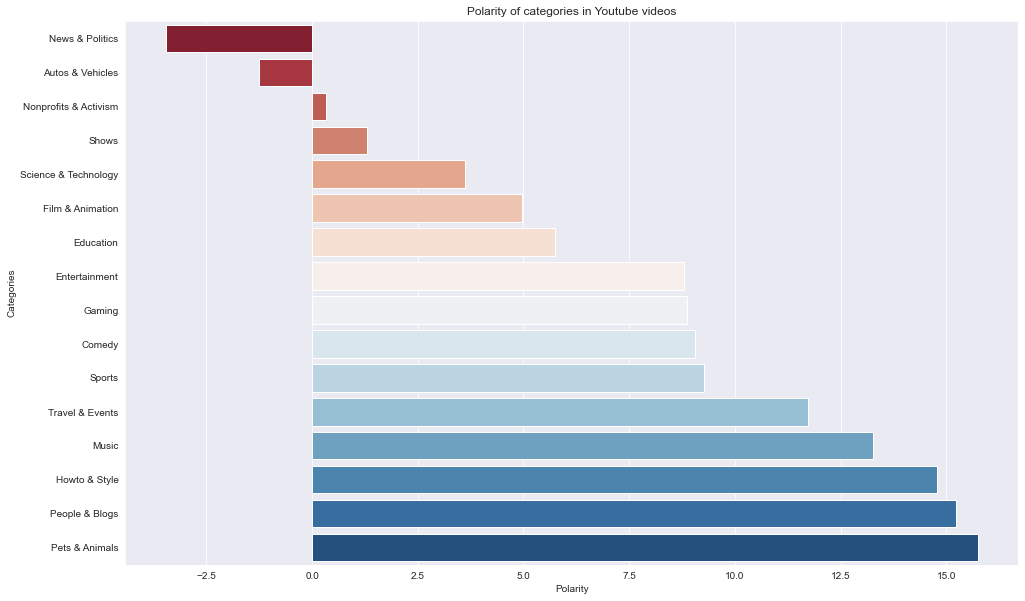

In [39]:
plt.figure(figsize=(16,10))
sns.set_style('darkgrid')
ax=sns.barplot(x=tags_sentiment['polarity'],y=tags_sentiment['category'],data=tags_sentiment,
               orient='h',palette='RdBu')
plt.ylabel('Categories')
plt.xlabel('Polarity')
plt.title('Polarity of categories in Youtube videos');

# Analysis : What's the tags in the most negative and most positive category? What's the most discuss words for Science & Technology?

In [40]:
def wcloud(data,bgcolor):
    plt.figure(figsize=(16,10))
    cloud=WordCloud(background_color=bgcolor, max_words=100, max_font_size=50)
    cloud.generate(' '.join(data))
    plt.imshow(cloud)
    plt.axis('off')

News & Politics

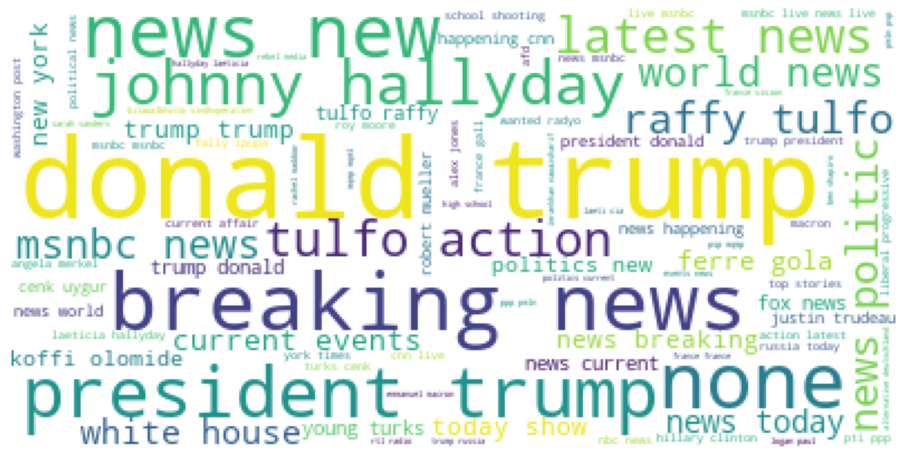

In [43]:
tags_word = my_df[my_df['category'] == 'News & Politics']['tags'].str.lower().str.cat(sep=' ')

tags_word=re.sub('[^A-Za-z]+',' ',tags_word)
word_tokens=word_tokenize(tags_word)
filtered_sentence=[w for w in word_tokens if not w in en_stopwords]
without_single_chr=[word for word in filtered_sentence if len(word)>2]
cleaned_data_title=[word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title, 'white')

People & Blogs

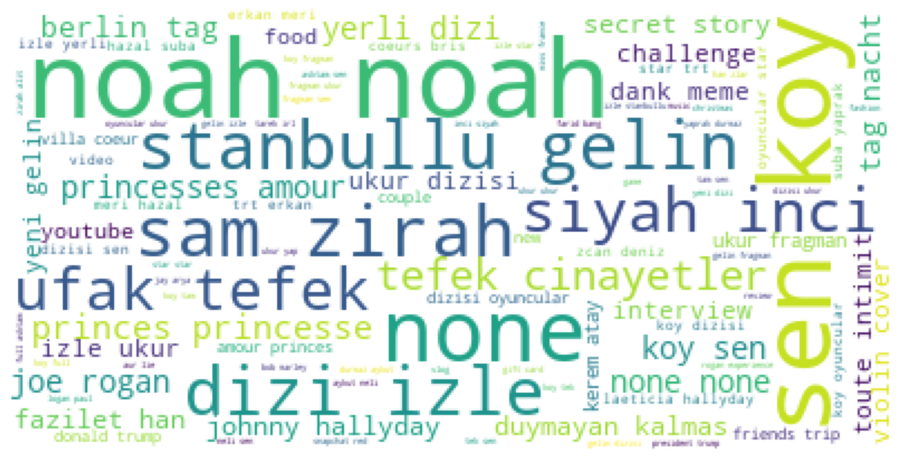

In [44]:
tags_word = my_df[my_df['category'] == 'People & Blogs']['tags'].str.lower().str.cat(sep=' ')

tags_word=re.sub('[^A-Za-z]+',' ',tags_word)
word_tokens=word_tokenize(tags_word)
filtered_sentence=[w for w in word_tokens if not w in en_stopwords]
without_single_chr=[word for word in filtered_sentence if len(word)>2]
cleaned_data_title=[word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title, 'white')

Science & Technology

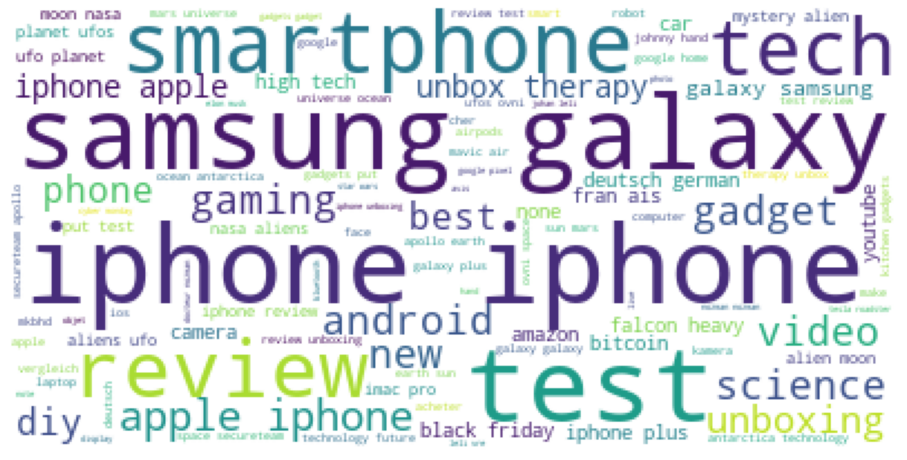

In [45]:
tags_word = my_df[my_df['category'] == 'Science & Technology']['tags'].str.lower().str.cat(sep=' ')

tags_word=re.sub('[^A-Za-z]+',' ',tags_word)
word_tokens=word_tokenize(tags_word)
filtered_sentence=[w for w in word_tokens if not w in en_stopwords]
without_single_chr=[word for word in filtered_sentence if len(word)>2]
cleaned_data_title=[word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title, 'white')